# **Overview**


*   What business problem are we trying to solve and why?
> **Underestand the statistical difference (if any) that age and race have on voting, by seeing if there is any difference in average age of voters in different race groups.**
*   Brief explanation of one-way ANOVA test (what is it, what are the assumptions, how would you interpret it).
> **the one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one catigorical variable (do any of the group means differ from one another). Inorder for the results of a oneway ANOVA test to be accurate, we assume that the responce variable residuals are normally distirbuted and variance of populations are equal. The ANOVA test does not indicate which group means are different, but it simply outputs the F-satistics and p-value of the analysis. From the p-value one can determine wheather the differences between some of the means are statistically significant.** 
*   What is the F-test and F-statistic?
> **F-test: any statistical test in which the test statistic has an F-distirbution (used to test wheather two independent samples have been drawn for the normal population with the same varience) under the null hypothesis.**<br>
>**F-statistic: The value outputed from a ANOVA test or a regression analysis to find out if the means between two populations are significantlly different.**
*   Bonferroni correction definition.
> **It is a multiple-comparison correction used when several dependent or independent statistical tests are being performed simultaneously. to account for the multiple comparisons problem that may end up rejecting results that are actually significant.**
*   Why would you use Tukey’s test?
> **The Turkey's HSD allows one to locate the differences indicated by an ANOVA test. It allows us to find out which specific group means (compared to one another) are different.**
*   What are we doing in this assignment from dataset and objective perspective.
> **The goal of the statistical tests was to see if there is any obsorved difference in average age of voters from different race groups.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

In [ ]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race1 = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age1 = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame1 = pd.DataFrame({"race":voter_race1,"age":voter_age1})

#EDA
print("EDA on voter_frame1 (no significant difference):")
print("\ndata frame's first five observations of the data:")
print(voter_frame1.head())
print("\nTotal number of rows(observations) and columns(characteristics):")
print(voter_frame1.shape)
print("\ncolums and their data types:")
print(voter_frame1.info())
print("\ndata frame summery:")
print(voter_frame1.describe())

EDA on voter_frame1 (no significant difference):

data frame's first five observations of the data:
       race  age
0     black   51
1     white   49
2  hispanic   51
3     white   48
4     asian   56

Total number of rows(observations) and columns(characteristics):
(1000, 2)

colums and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   race    1000 non-null   object
 1   age     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

data frame summery:
               age
count  1000.000000
mean     47.773000
std       5.308074
min      34.000000
25%      44.000000
50%      48.000000
75%      51.000000
max      66.000000


In [ ]:
groups1 = voter_frame1.groupby("race").groups

# Etract individual groups
asian = voter_age1[groups1["asian"]]
black = voter_age1[groups1["black"]]
hispanic = voter_age1[groups1["hispanic"]]
other = voter_age1[groups1["other"]]
white = voter_age1[groups1["white"]]

# Perform the ANOVA on data frame 1
print("ANOVA test on voter_frame1:")
print(stats.f_oneway(asian, black, hispanic, other, white))

ANOVA test on voter_frame1:
F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)


**Since the P value from the ANOVA test on voter_frame1 is above 0.05 significance level we can assue that there is no significant difference in mean age of voters from different race groups.** 

In [ ]:
# Get all race pairs
race_pairs1 = []

for race11 in range(4):
    for race12  in range(race11+1,5):
        race_pairs1.append((races[race11], races[race12]))

pvals1 = []
# Conduct t-test on each pair with bonferroni correction
print("T test on on each pair on voter_frame1:\n")
for race11, race12 in race_pairs1: 
    print(race11, race12)
    t_test1 = stats.ttest_ind(voter_age1[groups1[race11]], 
                          voter_age1[groups1[race12]])
    print(t_test1)
    pvals1.append(t_test1.pvalue)
    print("\n")

print("bonferroni correction on p-values obtained from T tests on voter_frame1:")
bonferroni1 = multipletests(pvals1, alpha=.05, method='bonferroni', is_sorted=True)

i = 0 
for race11, race12 in race_pairs1: 
    print(race11, race12)
    print("NULL Hypothesis rejected?             ", bonferroni1[0][i])
    print("Corrected P values for multiple test: ", bonferroni1[1][i], "\n")
    i += 1
print("Corrected alpha after bonferroni:     ", bonferroni1[2])


        

T test on on each pair on voter_frame1:

asian black
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)


asian hispanic
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)


asian other
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)


asian white
Ttest_indResult(statistic=1.7847665455760953, pvalue=0.07484331440702094)


black hispanic
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)


black other
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)


black white
Ttest_indResult(statistic=0.1754225782292794, pvalue=0.860801405242227)


hispanic other
Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)


hispanic white
Ttest_indResult(statistic=1.5959271355589721, pvalue=0.11092241932285327)


other white
Ttest_indResult(statistic=1.866874647450789, pvalue=0.06243863321791571)


bonferroni correction on p-values obtained from T tests on voter_fram

**Our results from the ANOVA test on voter_frame 1 is confirmed. Using the T test and the Bonferroni test, we can see that there is no significant difference in P values of race group pairs and the NULL Hypothesis is not rejected on any of the pairs.** 

Tukey test on voter_frame1


group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.3353,0.5735,-3.8242,1.1535,False
asian,hispanic,-0.7593,0.9,-3.1315,1.6129,False
asian,other,-0.0264,0.9,-3.0202,2.9674,False
asian,white,-1.4184,0.4336,-3.6932,0.8564,False
black,hispanic,0.576,0.8145,-0.9362,2.0882,False
black,other,1.309,0.5494,-1.0622,3.6801,False
black,white,-0.0831,0.9,-1.4374,1.2713,False
hispanic,other,0.733,0.8996,-1.5154,2.9813,False
hispanic,white,-0.6591,0.4974,-1.7847,0.4665,False
other,white,-1.392,0.3912,-3.5374,0.7533,False


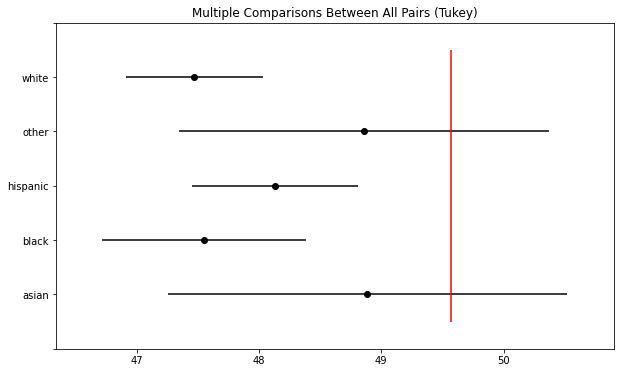

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey1 = pairwise_tukeyhsd(endog=voter_age1,     # Data
                          groups=voter_race1,   # Groups
                          alpha=0.05)          # Significance level

tukey1.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

print("Tukey test on voter_frame1")
tukey1.summary()              # See test summary

**More over, using the Tukey test we can see that NULL Hypothesis is not rejected on any of the pairs of race groups. From the Multicomparison plot we can see that all of the confidence intervals and means are on the right side of the threshhold (red line).** 

In [ ]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame2 = pd.DataFrame({"race":voter_race,"age":voter_age})

#EDA
print("EDA on voter_frame2 (significant difference):")
print("\ndata frame's first five observations of the data:")
print(voter_frame2.head())
print("\nTotal number of rows(observations) and columns(characteristics):")
print(voter_frame2.shape)
print("\ncolums and their data types:")
print(voter_frame2.info())
print("\ndata frame summery:")
print(voter_frame2.describe())


EDA on voter_frame2 (significant difference):

data frame's first five observations of the data:
       race  age
0     black   54
1     white   51
2  hispanic   53
3     white   50
4     asian   51

Total number of rows(observations) and columns(characteristics):
(1000, 2)

colums and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   race    1000 non-null   object
 1   age     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

data frame summery:
              age
count  1000.00000
mean     49.14100
std       5.72205
min      29.00000
25%      45.00000
50%      49.00000
75%      53.00000
max      72.00000


In [ ]:
groups = voter_frame2.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
print("ANOVA test on voter_frame2:")
print(stats.f_oneway(asian, black, hispanic, other, white))

ANOVA test on voter_frame2:
F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)


**Since the P value from the ANOVA test on voter_frame2 is above 0.05 significance level we can assue that there is a significant difference in mean age of voters from different race groups.**

In [ ]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

pvals = []
# Conduct t-test on each pair with bonferroni correction
print("T test on on each pair on voter_frame2:\n")
for race1, race2 in race_pairs: 
    print(race1, race2)
    t_test = stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]])
    print(t_test)
    pvals.append(t_test.pvalue)
    print("\n")

print("bonferroni correction on p-values obtained from T tests on voter_frame2:")
bonferroni = multipletests(pvals, alpha=.05, method='bonferroni', is_sorted=True)

i = 0 
for race1, race2 in race_pairs: 
    print(race1, race2)
    print("NULL Hypothesis rejected?             ", bonferroni[0][i])
    print("Corrected P values for multiple test: ", bonferroni[1][i], "\n")
    i += 1
print("Corrected alpha after bonferroni:     ", bonferroni[2])
  

T test on on each pair on voter_frame2:

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)


asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)


asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)


asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)


black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)


black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)


black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)


hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)


hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)


other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


bonferroni correction on p-values obtained from T tests on vot

**Our result from the ANOVA test on voter_frame 2 is confirmed. Using the T test and the Bonferroni test, as we can see that there is significant difference in P values of race group pairs and the NULL Hypothesis is rejected for pairs where one of there race groups is white (expect for asian vs white, which explained more in the next section).**

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


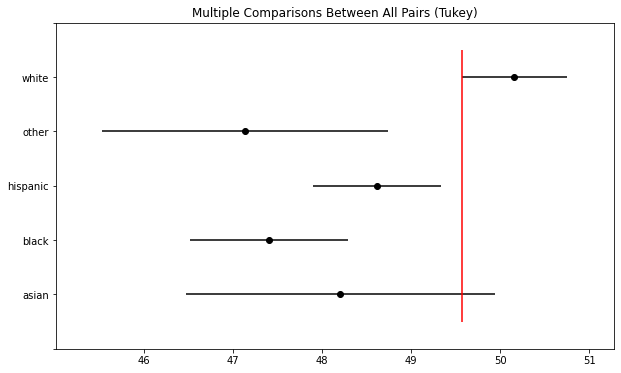

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

**More over, using the Tukey test we can see that NULL Hypothesis is rejected on most groups consisting the white race group as one of the pairs. From the Multicomparison plot we can see that there is overlap between asain and white race which explains why the NULL hypothesis was not rejected for that comparison.** 

# **Conclusion**
**From the models obtained from both data sets we were not supprized to see that there was no statistically significant difference in the average age of voters in different race groups based on data frame 1. Even though the rest of the tests (T-test, Bonferroni, and Tukey) were not necessary, our acceptence of the H0 was reinforced by their results. For data frame 2 Since we had intentially set up the sudo data to have a different average age for the white race group, we saw from the ANOVA test that the pvalue was lower than the significance level and H0 was rejected. Then we furthur explored to see exactly which two race group pairs have significantly different average ages using the T-test, Bonferroni, and Tukey and we obtained that the groups containing the white group resulted in different age average. We were able to solve the problem we had set which was to find out if there was any significant difference in average age of different race groups.**